Adam Weinstein


u0747284


CS6017


7.16.2022


HW6


We'll use the PyTorch library to train a neural net based classifier on a higher-res version of a handwritten digit dataset

In the code below, four neural networks are trained, all with 50 epochs. The first two are Base_Net and Net. Base_Net has one convolution layer and Net has three. Net3 is trained on two fonts, Calibrri and Garamond. For all of the net methods, the code repeats twice --the data is loaded and retrained twice--to make sure that the neural nets are using fresh data. Following the two nets I:


* Evaluate the network using cross validation (splitting data into training/testing). BaseNet trains at 90%.
* Create and train a different network topology (add more convolution layers, experiment with normalization (batch normalization or dropout), explore other types/sizes of layer). With more convolution layers, Net trains at 50%. The more times each net is run, the better the performance.
* Try to find a topology that works better than the one described above. The topology I found that works best is in the Net function, which trains with 1 convolution layer. However, when training with more convolution layers, as in Net(), the results vary with different font sets. The the nets seem to perform best on fonts that are less stylize, and do not include serifs. While more epochs produce better results, 50 takes about 30 seconds, which seems reasonable.
* Test the accuracy of your network with character inputs from a DIFFERENT font set. How does it perform? I trained Net3() on Garamond and Calibrri, and then tested the trained net on Times. The accuracy went up to 58%, which was surprisingly good. 
* Train my best network on inputs from the data from at least 2 different fonts.  How does your accuracy compare to the 1-font case? What accuracy do you see when testing with inputs from a font you didn't train on? I trained the double net with Calibri and Garamond, and the results were 77% accuracy, which are suprisingly good.
* Finally, I use CNN() to denoise the images and compare the results against the ASCII characters. The plotted results can be found in the very last frame.

Step 1 : Base Net

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import torchvision

import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



In [201]:

from soupsieve import select


font_reader = pd.read_csv("fonts/CALIBRI.csv")

df = pd.DataFrame( font_reader )
df = df[df['m_label'] < 127]
pd.set_option('display.max_columns', None)

#use .values to transform df into array
#Xs which is a #samples x 20 x 20 array containing the pixel values, 
# and Ys which is a #samples x 1 array containing the ascii vales for each character

Xs_raw = df.iloc[:,12:].values
Ys_raw = df.loc[:,'m_label'].values
# print("max: ", Ys_raw.max())
# print("min: ", Ys_raw.min())

xs_norm = Xs_raw/256.0


# print( "norm: ", xs_norm[0,: 10] )
# print ("raw : ", Xs_raw[0,: 10] )



Compile and train your network like we did in class. You'll probably have to use the np.reshape() function on your data to make PyTorch happy. I reshaped my X values like np.reshape(Xs, (-1, 1, 20, 20)) to get them in the right format.

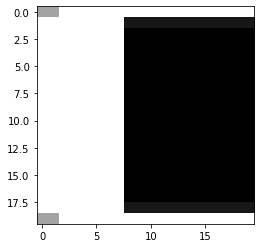

In [202]:
Xs = np.reshape(xs_norm, (-1, 1, 20, 20))
# print (len(Xs))
# print ((xs_norm.shape))
# print ( Xs.shape )

keys, indices = np.unique(Ys_raw, return_index=True)
    
#real to dictionary, dictionary to real
iToA= dict(zip(indices, keys))
#index to Ascii
aToI = dict(zip(keys, indices))
#Ascii to index

indx = 35
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
# print("to ascii", ascii_val, chr(ascii_val) )
# print("to indx: ", indx_val )

img = Xs[ indx ]
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )

# print(keys)
# print(indices)


In [203]:
Ys = np.zeros(len(Ys_raw), dtype=int)
for i in range(len(Ys_raw)):
   Ys[i] = aToI[Ys_raw[i]]


# Ys = torch.from_numpy(Ys)

# print(Ys)
# print(type(Ys))
# print(len(Ys))

# print( "max", max(Ys) )
# print( "min", min(Ys) )

count = 0

# for y in Ys:
#    if y == 35:
#       count += 1
# print("count:", count)

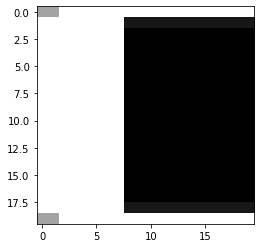

In [204]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torch.utils.data import TensorDataset, DataLoader

train_data = []
for i in range(len(Xs)):
    train_data.append([Xs[i], Ys[i]])

#my_train, my_test = train_test_split(train_data, test_size=.25)

#xTrain, xTest, yTrain, yTest = train_test_split(Xs, Ys, test_size=.25)

xTrain = Xs[:int(len(Xs)*3/4)]
xTest = Xs[int(len(Xs)*3/4):]
yTrain = Ys[:int(len(Xs)*3/4)]
yTest = Ys[int(len(Xs)*3/4):]

Xs_set = torch.from_numpy(xTrain).to(torch.float)
Ys_set = torch.from_numpy(yTrain)

YT_set = torch.from_numpy(xTest).to(torch.float)
XT_set = torch.from_numpy(yTest)

my_train = TensorDataset(Xs_set, Ys_set) # create your datset
my_test = TensorDataset(Xs_set, Ys_set)

b_my_train = TensorDataset(Xs_set, Ys_set)
# print( b_my_train[0][0].shape) # create your datset
b_my_test = TensorDataset(Xs_set, Ys_set)

indx = 35

# print("index is: ", Ys_set[indx])
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
# print("to ascii", ascii_val, chr(ascii_val) )
# print("to indx: ", indx_val )

img = Xs_set[aToI[ ascii_val ]]
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )

ascii:  126
~
ascii:  125
}
ascii:  124
|
ascii:  123
{
ascii:  122
z
ascii:  121
y
ascii:  120
x
ascii:  119
w
ascii:  118
v
ascii:  117
u
ascii:  116
t
ascii:  115
s
ascii:  114
r
ascii:  113
q
ascii:  112
p
ascii:  111
o
ascii:  110
n
ascii:  109
m
ascii:  108
l
ascii:  107
k
ascii:  106
j
ascii:  105
i
ascii:  104
h
ascii:  103
g
ascii:  102
f
ascii:  101
e
ascii:  100
d
ascii:  99
c
ascii:  98
b
ascii:  97
a
ascii:  96
`
ascii:  95
_
ascii:  94
^
ascii:  93
]
ascii:  92
\
ascii:  91
[
ascii:  90
Z
ascii:  89
Y
ascii:  88
X
ascii:  87
W
ascii:  86
V
ascii:  85
U
ascii:  84
T
ascii:  83
S
ascii:  82
R
ascii:  81
Q
ascii:  80
P
ascii:  79
O
ascii:  78
N
ascii:  77
M


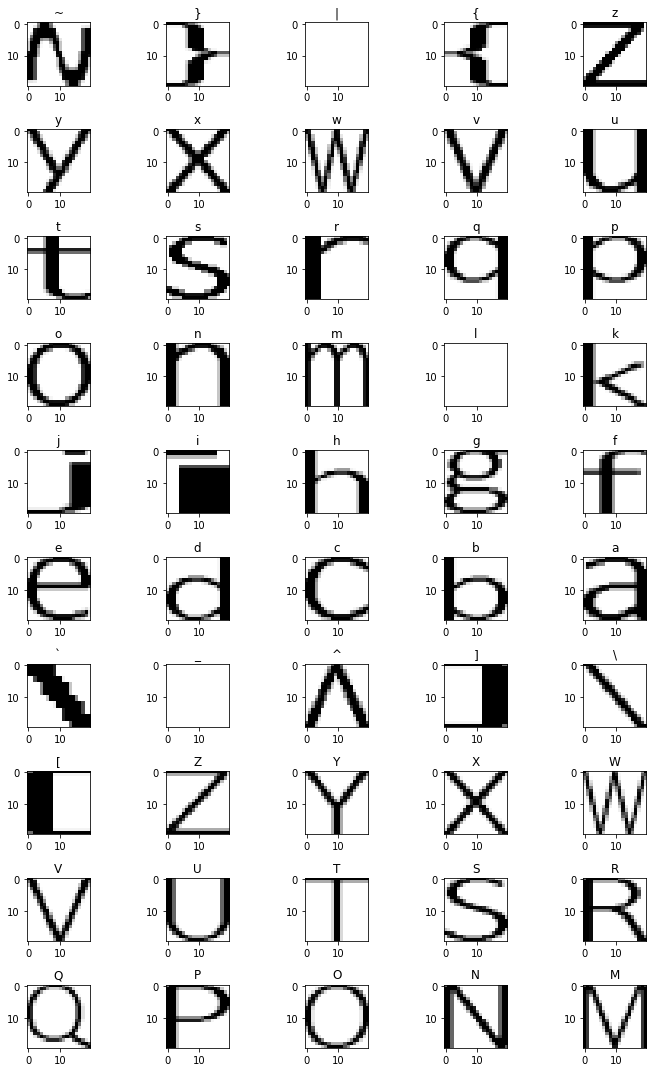

In [205]:
plt.figure( figsize= (10, 15) )

for ii in np.arange( 50 ):
   plt.subplot( 10, 5, ii+1 )
   plt.imshow( Xs[ii, 0, :, :], cmap='Greys',interpolation='none' )
   plt.title( chr(iToA[Ys[ii]]) )
   print("ascii: ", iToA[Ys[ii]])
   print(chr(iToA[Ys[ii]]))
plt.tight_layout()
plt.show()

to ascii 121 y
to indx:  5
<class 'numpy.ndarray'>


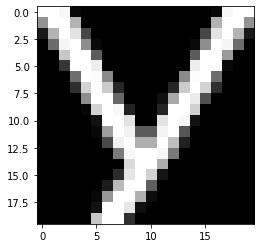

In [206]:
indx = 5
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
print("to ascii", ascii_val, chr(ascii_val) )
print("to indx: ", indx_val )

img = Xs[ indx ]
print( type (Xs))
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )

In [207]:
class BaseNet(nn.Module):
    def __init__(self):
        super(BaseNet, self).__init__()
        c1Out = 8 
        # convolution layer 1 will output 6 "images": one for each filter it trains
        
        self.conv1 = nn.Conv2d( 1, c1Out, 3 ) # 1-D input, c1Out outputs, filter size 3x3 pixels
        
        # (28-2) x (28 -2) x c1Out outputs  # "-2" because 3x3 mask loses the 1st/last row/column
        
        self.pool = nn.MaxPool2d( 2, 2 ) # down sample 2x2 blocks to 1 value
       
        
        #self.pooledOutputSize = c1Out * 2 * 2 # 16 outputs per image whose size has been reduced
        #self.fc1 = nn.Linear( self.pooledOutputSize, 120 )
        
        #number of neurons in the layer
        self.fc1 = nn.Linear( 648, 400 )
        #dropping number of neurons
        self.fc2 = nn.Linear( 400, 200 )    
        #number of unique ys
        self.fc3 = nn.Linear( 200, len(Ys) ) # length of outputs, shouldn't be hardcoded

    ################################################################################
    # Take an image (or images) and run it through all stages of the net:
    #    
    def forward( self, x ): # "batch" of images
        # print ("beginning ", x.shape)
        # x is 4D tensor:  (batch size, width, height, #channels (1, grayscale image))
        # after conv1:  (batch size, width adjusted, height adjusted, conv1 # outputs)
        # after max pool: (batch size, width/2, height/2, conv1 # outputs)
        # print ("the type is: ", type(x))
        # print("shape at 28" , x.shape) # During creation / debugging, getting the shape of layers correct is challenging... so display them.
        # x = F.relu(self.conv1(x))
        # print ("29 ", x.shape)
        # #x = self.conv1(x)
        # #print("shape at 31", x.shape)
        # #x = F.relu(x)
        # #print(x.shape)
        # #x = self.pool(x)
        # print ("36 ", x.shape)
        # print("shape at 35", x.shape)

        # Split into 2 lines above
        x = self.pool(F.relu(self.conv1(x)))  #apply convolution filter, then run it through relu activation function
        #x = self.pool(F.relu(self.conv2(x))) #ditto
        # print("42: ", x.shape) #uncomment to see the size of this layer.  It helped me figure out what pooledOutputSize shoudl be

        # Flatten: turn the 5x5xc2Out array into a single 1xN array.  The dense layers expect a 1D thing
       
        #print("45 ", x.shape)
        #x = x.view(x.shape[0], -1)  #equivalent ways of reshaping the data to be 1D
        #x = x.view(batch_size( x.shape[0]) , -1)
        
        x = x.view(-1, self.num_flat_features(x))
        # print("flattened image ", x.shape)

        x = F.relu(self.fc1(x)) #apply dense layer 1
        
        # print ("line 49: ", x.shape)
        x = F.relu(self.fc2(x)) #and dense layer 2, using ReLU activation
        # print ("54: ", x.shape)
        x = self.fc3(x) #final dense layer.  No activation function on this
        # print ("54 end ", x.shape)
        return x
    
    #compute the output size after our convolution layers
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


b_net = BaseNet()

In [208]:
def b_train( model, epochs ): # One epoch uses the entire training set (one batch at a time) - 60,000 images in this case
    
    criterion = nn.CrossEntropyLoss() # this is a way of measuring error (loss) for classification that takes the
                                      # "confidence" of a prediction into account.  High confidence, correct predictions are low cost, 
                                      # high confidence, wrong predictions are high cost, medium confidence predictions have cost

    # use the ADAM optimizer to find the best weights
    optimizer = optim.Adam( model.parameters(), lr= 1e-4 ) 
    
    #this loads data and gets it in the right format for us
    trainloader = torch.utils.data.DataLoader( 
        b_my_train, 
        batch_size=8,
        shuffle=False, 
        num_workers=0,
        collate_fn=None,
        pin_memory=False )

    #print( "my data is: ", my_train)

    # print("here:", max(my_train.tensors[1]))
    # print("here:", min(my_train.tensors[1]))

    for epoch in range( epochs ): # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate( trainloader, 0 ):
            # get the inputs; data is a list of [inputs, labels]

            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            #print("shape:", inputs.shape)
            outputs = model(inputs) #predict the output with some training data
            # print("These are my labels: " , labels)
            # print( "length of outputs: ", len(outputs))
            # print("outputs.shape 39 " , outputs.shape)
            loss = criterion(outputs, labels) #see how well we did
            # print ("loss ")
            loss.backward() #see how to change the weights to do better
            optimizer.step() #and actually change the weights

            # print statistics
            running_loss += loss.item()
            if i % 20 == 19:    # print every 2000 mini-batches
                # print('[%d, %5d] loss: %.3f' %
                      #(epoch + 1, i + 1, running_loss / 20))
                running_loss = 0.0

    print('Finished Training')

def b_evaluate( model ):  
    #load some test data
    testloader = torch.utils.data.DataLoader( 
        b_my_test, 
        batch_size=8,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
    
    correct = 0
    total = 0

    with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
        for data in testloader:
            images, labels = data
            outputs = model( images )
            _, predicted = torch.max(outputs.data, 1)
            #print("predict:", predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Just do a coarse evaluation... how many did we predict correcly?
    print( 'Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total) )
    

In [134]:
print( "Training..." )
b_train( b_net, 50 )

print( "Evaluating..." )
b_evaluate( b_net )

Training...
Finished Training
Evaluating...
Accuracy of the network on the 10000 test images: 91 %


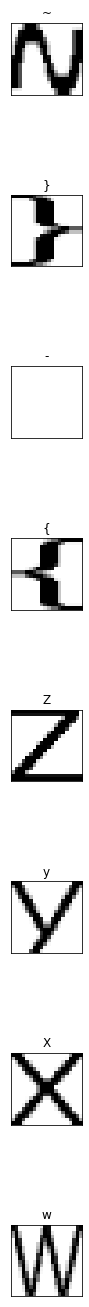

In [135]:
def drawComparisonsCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test, batch_size=1, shuffle=False, num_workers=0)
   plt.figure(figsize=(20, 25))
   with torch.no_grad():
      for i, batch in enumerate(test_loader):
         if i >= 8: break
         #images = batch[0]
         images, labels = batch
         #print(images.shape)
     
         label = model(images)
         
         for j in range(len(images)):
            _, index = ( torch.max(label.data, 1) )
            # print (index)
            # print( images[0][j].shape)
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[0][j].reshape((20,20)), cmap="Greys", interpolation=None)
            # print (len(label[0]))
            # print ((label))
            # print (int(label))
            plt.title( chr(iToA[int(index)]) )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComparisonsCNN(b_net)

Step 2: net with multiple convolution layers

In [209]:

#read in data from file
#props_one = pd.read_csv( "realEstate1.csv" )
from soupsieve import select


agency_reader = pd.read_csv("fonts/CALIBRI.csv")

df = pd.DataFrame( agency_reader )
df = df[df['m_label'] < 127]
pd.set_option('display.max_columns', None)

#use .values to transform df into array
#Xs which is a #samples x 20 x 20 array containing the pixel values, 
# and Ys which is a #samples x 1 array containing the ascii vales for each character

Xs_raw = df.iloc[:,12:].values
Ys_raw = df.loc[:,'m_label'].values
print("max: ", Ys_raw.max())
print("min: ", Ys_raw.min())

#xs_norm = preprocessing.normalize(Xs_raw)
xs_norm = Xs_raw/255.0


print( "norm: ", xs_norm[0,: 10] )
print ("raw : ", Xs_raw[0,: 10] )



max:  126
min:  33
norm:  [0.00392157 0.00392157 0.00392157 0.55294118 1.         1.
 1.         0.58823529 0.00392157 0.00392157]
raw :  [  1   1   1 141 255 255 255 150   1   1]


Compile and train your network like we did in class. You'll probably have to use the np.reshape() function on your data to make PyTorch happy. I reshaped my X values like np.reshape(Xs, (-1, 1, 20, 20)) to get them in the right format.

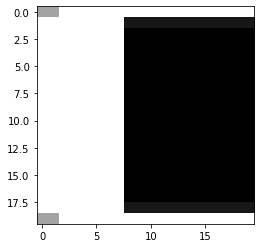

In [210]:
Xs = np.reshape(xs_norm, (-1, 1, 20, 20))

    
keys, indices = np.unique(Ys_raw, return_index=True)

    
#real to dictionary, dictionary to real
iToA= dict(zip(indices, keys))
#index to Ascii
aToI = dict(zip(keys, indices))
#Ascii to index

# XTrain_tensor = torch.from_numpy(XTrain).to(torch.float)
# XTest_tensor = torch.from_numpy(XTest).to(torch.float)


indx = 35
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
# print("to ascii", ascii_val, chr(ascii_val) )
# print("to indx: ", indx_val )

img = Xs[ indx ]
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )

# print(keys)
# print(indices)


In [211]:
Ys = np.zeros(len(Ys_raw), dtype=int)
for i in range(len(Ys_raw)):
   Ys[i] = aToI[Ys_raw[i]]


# Ys = torch.from_numpy(Ys)

# print(Ys)
# print(type(Ys))
# print(len(Ys))

# print( "max", max(Ys) )
# print( "min", min(Ys) )

# count = 0

# for y in Ys:
#    if y == 35:
#       count += 1
# print("count:", count)

to ascii 91 [
to indx:  35


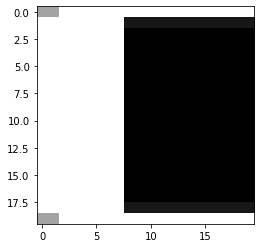

In [212]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torch.utils.data import TensorDataset, DataLoader

train_data = []
for i in range(len(Xs)):
    train_data.append([Xs[i], Ys[i]])

#my_train, my_test = train_test_split(train_data, test_size=.25)

#xTrain, xTest, yTrain, yTest = train_test_split(Xs, Ys, test_size=.25)

xTrain = Xs[:int(len(Xs)*3/4)]
xTest = Xs[int(len(Xs)*3/4):]
yTrain = Ys[:int(len(Xs)*3/4)]
yTest = Ys[int(len(Xs)*3/4):]

Xs_set = torch.from_numpy(xTrain).to(torch.float)
Ys_set = torch.from_numpy(yTrain)

XT_set = torch.from_numpy(xTest).to(torch.float)
YT_set = torch.from_numpy(yTest)



#this was working
# Xs_set = torch.from_numpy(Xs).to(torch.float)
# Ys_set = torch.from_numpy(Ys)

# YT_set = torch.from_numpy(Xs).to(torch.float)
# XT_set = torch.from_numpy(Ys)



# trainer = TensorDataset(Xs_set,Ys_set)
# tester = TensorDataset(Xs_set,Ys_set)


my_train = TensorDataset(Xs_set, Ys_set) # create your datset
my_test = TensorDataset(XT_set, YT_set)

b_my_train = TensorDataset(Xs_set, Ys_set) # create your datset
b_my_test = TensorDataset(XT_set, YT_set)

indx = 35

# print("index is: ", Ys_set[indx])
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
print("to ascii", ascii_val, chr(ascii_val) )
print("to indx: ", indx_val )

img = Xs_set[aToI[ ascii_val ]]
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )





In [213]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        c1Out = 6 # convolution layer 1 will output 6 "images": one for each filter it trains
        c2Out = 16 # similarly for the 2nd convolution layer
        self.conv1 = nn.Conv2d( 1, c1Out, 3 ) # 1-D input, c1Out outputs, filter size 3x3 pixels
        
        # (28-2) x (28 -2) x c1Out outputs  # "-2" because 3x3 mask loses the 1st/last row/column
        
        self.pool = nn.MaxPool2d( 2, 2 ) # down sample 2x2 blocks to 1 value
        
        # 13*13*c1Out
        
        self.conv2 = nn.Conv2d( c1Out, c2Out, 3 ) # Inputs comes from conv1, specify our #outputs, use 3x3 blocks again
        
        # (13-2)*(13 -2)*c2Out
        # pool again
        # (11/2)*(11/2)*c2Out = 5x5 x c2Out
        
        #this is tricky.  The convolutions each shave 1 pixel off around the border, and then the
        #max pools reduce the number of pixels by 4
        self.pooledOutputSize = c2Out * 5 * 5 # 16 outputs per image whose size has been reduced
        
        # ******* Ax + b ([weight x input] + bias) since it’s just entirely linear, with no activation function. *****
        #All we're doing is just defining values for some layers, we're calling them fc1, fc2...etc, but you could call 
        # them whatever you wanted. The fc just stands for fully connected. Fully connected refers to the point that 
        # every neuron in this layer is going to be fully connected to attaching neurons. Nothing fancy going on here! 
        # Recall, each "connection" comes with weights and possibly biases, so each connection is a "parameter" for 
        # the neural network to play with.
        #In our case, we have 4 layers. Each of our nn.Linear layers expects the first parameter to be the input size, 
        # and the 2nd parameter is the output size.
        #So, our first layer takes in 28x28, because our images are 28x28 images of hand-drawn digits.
        # A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.
        #self.fc1 = nn.Linear( self.pooledOutputSize, 120 )
        
        #144 is the pooling layer number of nodes
        self.fc1 = nn.Linear( 144, 120 )
        self.fc2 = nn.Linear( 120, 84 )
        self.fc3 = nn.Linear( 84, len(Ys) ) # length of outputs, shouldn't be hardcoded

    ################################################################################
    # Take an image (or images) and run it through all stages of the net:
    #    
    def forward( self, x ): # "batch" of images
        # x is 4D tensor:  (batch size, width, height, #channels (1, grayscale image))
        # after conv1:  (batch size, width adjusted, height adjusted, conv1 # outputs)
        # after max pool: (batch size, width/2, height/2, conv1 # outputs)
        # print ("the type is: ", type(x))
        # print(x.shape) # During creation / debugging, getting the shape of layers correct is challenging... so display them.
        #x = F.relu(self.conv1(x)
        x = self.conv1(x)
        #print(x.shape)
        x = F.relu(x)
        #print(x.shape)
        x = self.pool(x)
       # print(x.shape)

        # Split into 2 lines above
        #x = self.pool(F.relu(self.conv1(x)))  #apply convolution filter, then run it through relu activation function
        x = self.pool(F.relu(self.conv2(x))) #ditto
        #print(x.shape) #uncomment to see the size of this layer.  It helped me figure out what pooledOutputSize shoudl be

        # Flatten: turn the 5x5xc2Out array into a single 1xN array.  The dense layers expect a 1D thing
        x = x.view(-1, self.num_flat_features(x))
        #print(x.shape)
        # x = x.view(x.shape[0], -1)  #equivalent ways of reshaping the data to be 1D
        # x = x.view(batch_size( x.shape[0]) , -1)
        x = F.relu(self.fc1(x)) #apply dense layer 1
        x = F.relu(self.fc2(x)) #and dense layer 2, using ReLU activation
        x = self.fc3(x) #final dense layer.  No activation function on this
        # print ("x shape: ",  x.shape)
        return x
    
    #compute the output size after our convolution layers
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()

In [214]:
def train( model, epochs ): # One epoch uses the entire training set (one batch at a time) - 60,000 images in this case
    
    criterion = nn.CrossEntropyLoss() # this is a way of measuring error (loss) for classification that takes the
                                      # "confidence" of a prediction into account.  High confidence, correct predictions are low cost, 
                                      # high confidence, wrong predictions are high cost, medium confidence predictions have cost

    # use the ADAM optimizer to find the best weights
    optimizer = optim.Adam( model.parameters(), lr= 1e-4 ) 
    
    #this loads data and gets it in the right format for us
    trainloader = torch.utils.data.DataLoader( 
        my_train, 
        batch_size=8,
        shuffle=False, 
        num_workers=0,
        collate_fn=None,
        pin_memory=False )

    #print( "my data is: ", my_train)

    # print("here:", max(my_train.tensors[1]))
    # print("here:", min(my_train.tensors[1]))

    for epoch in range( epochs ): # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate( trainloader, 0 ):
            # get the inputs; data is a list of [inputs, labels]

            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            #print("shape:", inputs.shape)
            outputs = model(inputs) #predict the output with some training data
            # print("These are my labels: " , labels)
            # print(outputs.shape)
            loss = criterion(outputs, labels) #see how well we did

            loss.backward() #see how to change the weights to do better
            optimizer.step() #and actually change the weights

            # print statistics
            running_loss += loss.item()
            if i % 20 == 19:    # print every 2000 mini-batches
                # print('[%d, %5d] loss: %.3f' %
                      #(epoch + 1, i + 1, running_loss / 20))
                running_loss = 0.0

    print('Finished Training')

def evaluate( model ):  
    #load some test data
    testloader = torch.utils.data.DataLoader( 
        my_test, 
        batch_size=8,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
    
    correct = 0
    total = 0

    with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
        for data in testloader:
            images, labels = data
            outputs = model( images )
            _, predicted = torch.max(outputs.data, 1)
            #print("predict:", predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Just do a coarse evaluation... how many did we predict correcly?
    print( 'Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total) )
    

In [215]:
print( "Training..." )
train( net, 50 )

print( "Evaluating..." )
evaluate( net )

Training...
Finished Training
Evaluating...
Accuracy of the network on the 10000 test images: 42 %


In [143]:
test_loader = torch.utils.data.DataLoader(my_test, batch_size=1,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
for i, batch in enumerate(test_loader):
    if i >= 8: break
    images = batch[0]
    
with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
    for data in test_loader:
        images, labels = data
        outputs = net( images )
        _, predicted = torch.max(outputs.data, 1)
        # print("predict:", predicted)
    #print(images.shape)
    # with torch.no_grad():
    #     label = model(images)
    #     print ( label )

# print ( len(my_train))
# print (my_train[751][1])
# for i in range(20):
#      print(my_train[i*2][1])
    

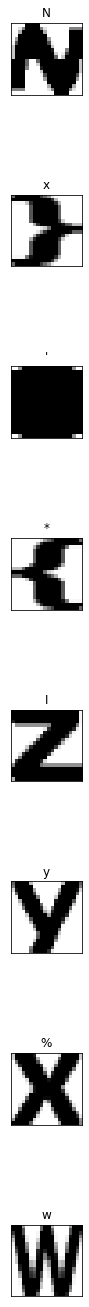

In [144]:
def drawComparisonsCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test, batch_size=1,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
   plt.figure(figsize=(20, 25))
   with torch.no_grad():
      for i, batch in enumerate(test_loader):
         if i >= 8: break
         images = batch[0]
         # images, labels = batch
         #print(images.shape)
     
         label = model(images)
         
         for j in range(len(images)):
            _, index = ( torch.max(label.data, 1) )
            # print (index)
            # print( images[j].shape)
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[j].reshape((20,20)), cmap="Greys", interpolation=None)
            # print (len(label[0]))
            # print ((label))
            # print (int(label))
            plt.title( chr(iToA[int(index)]) )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComparisonsCNN(net)

Step 3: New data is used to train the net

In [145]:

#read in data from file
from soupsieve import select


agency_reader = pd.read_csv("fonts/TIMES.csv")

df = pd.DataFrame( agency_reader )
df = df[df['m_label'] < 127]
pd.set_option('display.max_columns', None)

#use .values to transform df into array
#Xs which is a #samples x 20 x 20 array containing the pixel values, 
# and Ys which is a #samples x 1 array containing the ascii vales for each character

Xs_raw = df.iloc[:,12:].values
Ys_raw = df.loc[:,'m_label'].values
print("max: ", Ys_raw.max())
print("min: ", Ys_raw.min())

xs_norm = Xs_raw/256.0


print( "norm: ", xs_norm[0,: 10] )
print ("raw : ", Xs_raw[0,: 10] )



max:  126
min:  33
norm:  [0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.99609375
 0.99609375 0.99609375 0.99609375 0.99609375]
raw :  [  1   1   1   1   1 255 255 255 255 255]


Compile and train your network like we did in class. You'll probably have to use the np.reshape() function on your data to make PyTorch happy. I reshaped my X values like np.reshape(Xs, (-1, 1, 20, 20)) to get them in the right format.

to ascii 45 -
to indx:  35


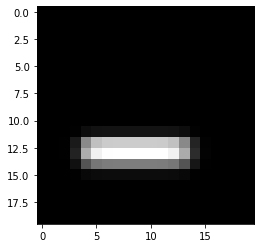

In [146]:
Xs = np.reshape(xs_norm, (-1, 1, 20, 20))
# print (len(Xs))
# print ((xs_norm.shape))
# print ( Xs.shape )

keys, indices = np.unique(Ys_raw, return_index=True)
    
#real to dictionary, dictionary to real
iToA= dict(zip(indices, keys))
#index to Ascii
aToI = dict(zip(keys, indices))
#Ascii to index

indx = 35
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
print("to ascii", ascii_val, chr(ascii_val) )
print("to indx: ", indx_val )

img = Xs[ indx ]
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )




In [147]:
Ys = np.zeros(len(Ys_raw), dtype=int)
for i in range(len(Ys_raw)):
   Ys[i] = aToI[Ys_raw[i]]


# Ys = torch.from_numpy(Ys)

# print(Ys)
# print(type(Ys))
# print(len(Ys))

# print( "max", max(Ys) )
# print( "min", min(Ys) )

# count = 0

# for y in Ys:
#    if y == 35:
#       count += 1
# print("count:", count)

to ascii 45 -
to indx:  35


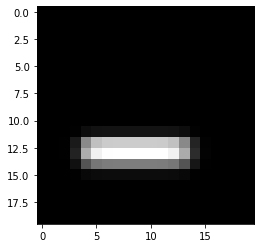

In [148]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torch.utils.data import TensorDataset, DataLoader

train_data = []
for i in range(len(Xs)):
    train_data.append([Xs[i], Ys[i]])

#my_train, my_test = train_test_split(train_data, test_size=.25)

#xTrain, xTest, yTrain, yTest = train_test_split(Xs, Ys, test_size=.25)

xTrain = Xs[:int(len(Xs)*3/4)]
xTest = Xs[int(len(Xs)*3/4):]
yTrain = Ys[:int(len(Xs)*3/4)]
yTest = Ys[int(len(Xs)*3/4):]

Xs_set = torch.from_numpy(xTrain).to(torch.float)
Ys_set = torch.from_numpy(yTrain)

XT_set = torch.from_numpy(xTest).to(torch.float)
YT_set = torch.from_numpy(yTest)

my_train = TensorDataset(Xs_set, Ys_set) # create your datset
my_test = TensorDataset(XT_set, YT_set)

# b_my_train = TensorDataset(Xs_set, Ys_set)
# print( b_my_train[0][0].shape) # create your datset
# b_my_test = TensorDataset(Xs_set, Ys_set)

indx = 35

# print("index is: ", Ys_set[indx])
ascii_val = iToA[ indx ]
indx_val = aToI[ ascii_val ]
print("to ascii", ascii_val, chr(ascii_val) )
print("to indx: ", indx_val )

img = Xs_set[aToI[ ascii_val ]]
img = img.reshape(20,20)
plt.imshow( img, cmap="gray", interpolation="none" )

In [149]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        c1Out = 6 # convolution layer 1 will output 6 "images": one for each filter it trains
        c2Out = 16 # similarly for the 2nd convolution layer
        self.conv1 = nn.Conv2d( 1, c1Out, 3 ) # 1-D input, c1Out outputs, filter size 3x3 pixels
        
        # (28-2) x (28 -2) x c1Out outputs  # "-2" because 3x3 mask loses the 1st/last row/column
        
        self.pool = nn.MaxPool2d( 2, 2 ) # down sample 2x2 blocks to 1 value
        
        # 13*13*c1Out
        
        self.conv2 = nn.Conv2d( c1Out, c2Out, 3 ) # Inputs comes from conv1, specify our #outputs, use 3x3 blocks again
        
        # (13-2)*(13 -2)*c2Out
        # pool again
        # (11/2)*(11/2)*c2Out = 5x5 x c2Out
        
        #this is tricky.  The convolutions each shave 1 pixel off around the border, and then the
        #max pools reduce the number of pixels by 4
        self.pooledOutputSize = c2Out * 5 * 5 # 16 outputs per image whose size has been reduced
        
        # ******* Ax + b ([weight x input] + bias) since it’s just entirely linear, with no activation function. *****
        #All we're doing is just defining values for some layers, we're calling them fc1, fc2...etc, but you could call 
        # them whatever you wanted. The fc just stands for fully connected. Fully connected refers to the point that 
        # every neuron in this layer is going to be fully connected to attaching neurons. Nothing fancy going on here! 
        # Recall, each "connection" comes with weights and possibly biases, so each connection is a "parameter" for 
        # the neural network to play with.
        #In our case, we have 4 layers. Each of our nn.Linear layers expects the first parameter to be the input size, 
        # and the 2nd parameter is the output size.
        #So, our first layer takes in 28x28, because our images are 28x28 images of hand-drawn digits.
        # A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.
        #self.fc1 = nn.Linear( self.pooledOutputSize, 120 )
        
        #144 is the pooling layer number of nodes
        self.fc1 = nn.Linear( 144, 120 )
        self.fc2 = nn.Linear( 120, 84 )
        self.fc3 = nn.Linear( 84, len(Ys) ) # length of outputs, shouldn't be hardcoded

    ################################################################################
    # Take an image (or images) and run it through all stages of the net:
    #    
    def forward( self, x ): # "batch" of images
        # x is 4D tensor:  (batch size, width, height, #channels (1, grayscale image))
        # after conv1:  (batch size, width adjusted, height adjusted, conv1 # outputs)
        # after max pool: (batch size, width/2, height/2, conv1 # outputs)
        # print ("the type is: ", type(x))
        # print(x.shape) # During creation / debugging, getting the shape of layers correct is challenging... so display them.
        #x = F.relu(self.conv1(x)
        x = self.conv1(x)
        #print(x.shape)
        x = F.relu(x)
        #print(x.shape)
        x = self.pool(x)
       # print(x.shape)

        # Split into 2 lines above
        #x = self.pool(F.relu(self.conv1(x)))  #apply convolution filter, then run it through relu activation function
        x = self.pool(F.relu(self.conv2(x))) #ditto
        #print(x.shape) #uncomment to see the size of this layer.  It helped me figure out what pooledOutputSize shoudl be

        # Flatten: turn the 5x5xc2Out array into a single 1xN array.  The dense layers expect a 1D thing
        x = x.view(-1, self.num_flat_features(x))
        #print(x.shape)
        # x = x.view(x.shape[0], -1)  #equivalent ways of reshaping the data to be 1D
        # x = x.view(batch_size( x.shape[0]) , -1)
        x = F.relu(self.fc1(x)) #apply dense layer 1
        x = F.relu(self.fc2(x)) #and dense layer 2, using ReLU activation
        x = self.fc3(x) #final dense layer.  No activation function on this
        # print ("x shape: ",  x.shape)
        return x
    
    #compute the output size after our convolution layers
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net3 = Net3()

In [150]:
def train( model, epochs ): # One epoch uses the entire training set (one batch at a time) - 60,000 images in this case
    
    criterion = nn.CrossEntropyLoss() # this is a way of measuring error (loss) for classification that takes the
                                      # "confidence" of a prediction into account.  High confidence, correct predictions are low cost, 
                                      # high confidence, wrong predictions are high cost, medium confidence predictions have cost

    # use the ADAM optimizer to find the best weights
    optimizer = optim.Adam( model.parameters(), lr= 1e-4 ) 
    
    #this loads data and gets it in the right format for us
    trainloader = torch.utils.data.DataLoader( 
        my_train, 
        batch_size=8,
        shuffle=False, 
        num_workers=0,
        collate_fn=None,
        pin_memory=False )

    #print( "my data is: ", my_train)

    # print("here:", max(my_train.tensors[1]))
    # print("here:", min(my_train.tensors[1]))

    for epoch in range( epochs ): # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate( trainloader, 0 ):
            # get the inputs; data is a list of [inputs, labels]

            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            #print("shape:", inputs.shape)
            outputs = model(inputs) #predict the output with some training data
            # print("These are my labels: " , labels)
            # print(outputs.shape)
            loss = criterion(outputs, labels) #see how well we did

            loss.backward() #see how to change the weights to do better
            optimizer.step() #and actually change the weights

            # print statistics
            running_loss += loss.item()
            if i % 20 == 19:    # print every 2000 mini-batches
                # print('[%d, %5d] loss: %.3f' %
                      #(epoch + 1, i + 1, running_loss / 20))
                running_loss = 0.0

    print('Finished Training')

def evaluate( model ):  
    #load some test data
    testloader = torch.utils.data.DataLoader( 
        my_test, 
        batch_size=8,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
    
    correct = 0
    total = 0

    with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
        for data in testloader:
            images, labels = data
            outputs = model( images )
            _, predicted = torch.max(outputs.data, 1)
            #print("predict:", predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Just do a coarse evaluation... how many did we predict correcly?
    print( 'Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total) )
    

In [151]:
print( "Training..." )
train( net3, 50 )

print( "Evaluating..." )
evaluate( net3 )

Training...
Finished Training
Evaluating...
Accuracy of the network on the 10000 test images: 58 %


tensor([5])
torch.Size([20, 20])
tensor([7])
torch.Size([20, 20])
tensor([7])
torch.Size([20, 20])
tensor([649])
torch.Size([20, 20])
tensor([59])
torch.Size([20, 20])
tensor([6])
torch.Size([20, 20])
tensor([280])
torch.Size([20, 20])
tensor([578])
torch.Size([20, 20])


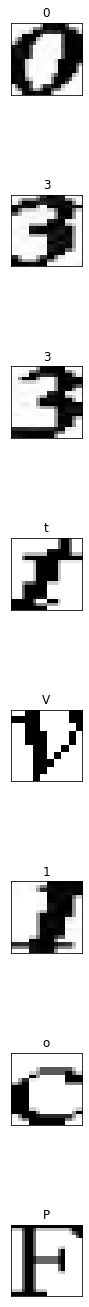

In [152]:
def drawComparisonsCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test, batch_size=1, shuffle=False, num_workers=0)
   plt.figure(figsize=(20, 25))
   with torch.no_grad():
      for i, batch in enumerate(test_loader):
         if i >= 8: break
         #images = batch[0]
         images, labels = batch
         #print(images.shape)
     
         label = model(images)
         
         for j in range(len(images)):
            _, index = ( torch.max(label.data, 1) )
            print (index)
            print( images[0][j].shape)
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[0][j].reshape((20,20)), cmap="Greys", interpolation=None)
            # print (len(label[0]))
            # print ((label))
            # print (int(label))
            plt.title( chr(iToA[int(index)]) )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComparisonsCNN(net3)

STEP 3.4 Trained network tested on two different font sets

In [153]:
#read in data from file
from soupsieve import select


read_gar = pd.read_csv("fonts/GARAMOND.csv")

df_Gar = pd.DataFrame( read_gar )
df_Gar = df_Gar[df_Gar['m_label'] < 127]
pd.set_option('display.max_columns', None)

Xs_r = df_Gar.iloc[:,12:].values
Ys_r = df_Gar.loc[:,'m_label'].values
# print("max: ", Ys_r.max())
# print("min: ", Ys_r.min())

xs_norm_Gar = Xs_r/256.0

###################################

read_cal = pd.read_csv("fonts/CALIBRI.csv")

df_calibri = pd.DataFrame( read_cal )
df_calibri = df_calibri[df_calibri['m_label'] < 127]
pd.set_option('display.max_columns', None)

Xs_r2 = df_calibri.iloc[:,12:].values
Ys_r2 = df_calibri.loc[:,'m_label'].values
# print("max: ", Ys_r2.max())
# print("min: ", Ys_r2.min())

xs_norm_calibri = Xs_r2/256.0


# print( "norm: ", xs_norm_calibri[0,: 10] )
# print ("raw : ", Xs_r2[0,: 10] )

# print ( len(Xs_r))
# print ( len(Ys_r))
# print ( len(Xs_r2))
# print ( len(Ys_r2))


In [154]:
Xs1 = np.reshape(xs_norm_Gar, (-1, 1, 20, 20))
keys1, indices1 = np.unique(Ys_r, return_index=True)
    
#real to dictionary, dictionary to real
iToA1= dict(zip(indices1, keys1))
#index to Ascii
aToI1 = dict(zip(keys1, indices1))
#Ascii to index

# indx1 = 35
# ascii_val1 = iToA1[ indx1 ]
# indx_val1 = aToI1[ ascii_val1 ]

# img1 = Xs1[ indx1 ]
# img1 = img1.reshape(20,20)
# plt.imshow( img1, cmap="gray", interpolation="none" )

####################################
Xs2 = np.reshape(xs_norm_calibri, (-1, 1, 20, 20))
keys2, indices2 = np.unique(Ys_r2, return_index=True)
    
#real to dictionary, dictionary to real
iToA2= dict(zip(indices2, keys2))
#index to Ascii
aToI2 = dict(zip(keys2, indices2))
#Ascii to index

# indx2 = 35
# ascii_val2 = iToA2[ indx2 ]
# indx_val2 = aToI2[ ascii_val2 ]

# img2 = Xs2[ indx2 ]
# img2 = img2.reshape(20,20)
# plt.imshow( img2, cmap="gray", interpolation="none" )



In [155]:
Ys1 = np.zeros(len(Ys_r), dtype=int)
for i in range((len(Ys_r))):
   Ys1[i] = aToI1[Ys_r[i]]

# count = 0

# for y1 in Ys1:
#    if y1 == 35:
#       count += 1


print(type(Ys1))
print(len(Ys1))

#################################

Ys2 = np.zeros(len(Ys_r2), dtype=int)
for i2 in range(len(Ys_r2)):
   Ys2[i2] = aToI2[Ys_r2[i2]]

# count2 = 0

# for y2 in Ys2:
#    if y2 == 35:
#       count2 += 1

print(type(Ys2))
print(len(Ys2))

<class 'numpy.ndarray'>
376
<class 'numpy.ndarray'>
752


In [156]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torch.utils.data import TensorDataset, DataLoader

train_data1 = []
for i1 in range(len(Xs1)):
    train_data.append([Xs1[i1], Ys1[i1]])

Xs_set1 = torch.from_numpy(Xs1).to(torch.float)
Ys_set1 = torch.from_numpy(Ys1)

my_test1 = TensorDataset(Xs_set1, Ys_set1) # create your datset

# indx = 35

# print("index is: ", Ys_set[indx])
# ascii_val = iToA[ indx ]
# indx_val = aToI[ ascii_val ]
# print("to ascii", ascii_val, chr(ascii_val) )
# print("to indx: ", indx_val )

# img = Xs_set[aToI[ ascii_val ]]
# img = img.reshape(20,20)
# plt.imshow( img, cmap="gray", interpolation="none" )



#######################################

Xs_set2 = torch.from_numpy(Xs2).to(torch.float)
Ys_set2 = torch.from_numpy(Ys2)

my_test2 = TensorDataset(Xs_set2, Ys_set2) # create your datset

# indx2 = 35

# print("index is: ", Ys_set2[indx2])
# ascii_val2 = iToA2[ indx2 ] 
# indx_val2 = aToI2[ ascii_val2 ]
# print("to ascii", ascii_val2, chr(ascii_val2) )
# print("to indx: ", indx_val2 )

# img2 = Xs_set2[aToI2[ ascii_val2 ]]
# img2 = img2.reshape(20,20)
# plt.imshow( img2, cmap="gray", interpolation="none" )

In [157]:
def evaluate( model, test_data ):  
    #load some test data
    testloader = torch.utils.data.DataLoader( 
        test_data, 
        batch_size=8,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
    
    correct = 0
    total = 0

    with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
        for data in testloader:
            images, labels = data
            outputs = model( images )
            _, predicted = torch.max(outputs.data, 1)
            #print("predict:", predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Just do a coarse evaluation... how many did we predict correcly?
    print( 'Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total) )

In [158]:
print( "Evaluating..." )
evaluate( net, my_test1 )



Evaluating...
Accuracy of the network on the 10000 test images: 30 %


In [159]:
print( "Evaluating..." )
evaluate( net, my_test2 )

Evaluating...
Accuracy of the network on the 10000 test images: 64 %


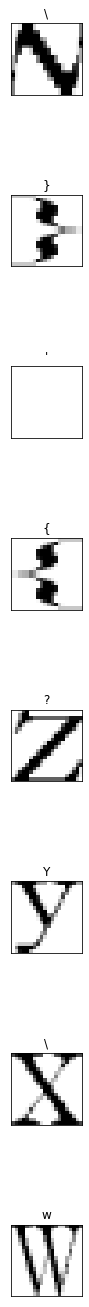

In [160]:
def drawComparisonsCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test1, batch_size=1, shuffle=False, num_workers=0)
   plt.figure(figsize=(20, 25))
   with torch.no_grad():
      for i, batch in enumerate(test_loader):
         if i >= 8: break
         #images = batch[0]
         images, labels = batch
         #print(images.shape)
     
         label = model(images)
         
         for j in range(len(images)):
            _, index = ( torch.max(label.data, 1) )
            # print (index)
            # print( images[0][j].shape)
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[0][j].reshape((20,20)), cmap="Greys", interpolation=None)
            # print (len(label[0]))
            # print ((label))
            # print (int(label))
            plt.title( chr(iToA1[int(index)]) )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComparisonsCNN(net)

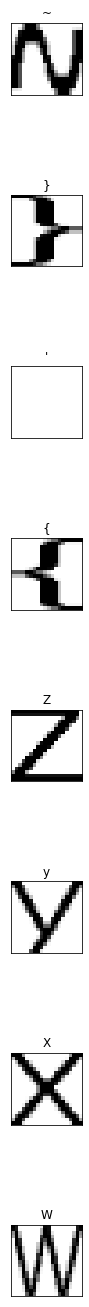

In [161]:
def drawComparisonsCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test2, batch_size=1, shuffle=False, num_workers=0)
   plt.figure(figsize=(20, 25))
   with torch.no_grad():
      for i, batch in enumerate(test_loader):
         if i >= 8: break
         #images = batch[0]
         images, labels = batch
         #print(images.shape)
     
         label = model(images)
         
         for j in range(len(images)):
            _, index = ( torch.max(label.data, 1) )
            # print (index)
            # print( images[0][j].shape)
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[0][j].reshape((20,20)), cmap="Greys", interpolation=None)
            # print (len(label[0]))
            # print ((label))
            # print (int(label))
            plt.title( chr(iToA2[int(index)]) )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComparisonsCNN(net)

In [192]:
#read in data from file
from soupsieve import select


read_gar = pd.read_csv("fonts/GARAMOND.csv")

df_Gar = pd.DataFrame( read_gar )
df_Gar = df_Gar[df_Gar['m_label'] < 127]
pd.set_option('display.max_columns', None)

Xs_r = df_Gar.iloc[:,12:].values
Ys_r = df_Gar.loc[:,'m_label'].values
print("max: ", Ys_r.max())
print("min: ", Ys_r.min())

# xs_norm_Gar = Xs_r/256.0

###################################

read_cal = pd.read_csv("fonts/CALIBRI.csv")

df_calibri = pd.DataFrame( read_cal )
df_calibri = df_calibri[df_calibri['m_label'] < 127]
pd.set_option('display.max_columns', None)

Xs_r2 = df_calibri.iloc[:,12:].values
Ys_r2 = df_calibri.loc[:,'m_label'].values
print("max: ", Ys_r2.max())
print("min: ", Ys_r2.min())

# xs_norm_calibri = Xs_r2/256.0


print( "norm: ", xs_norm_calibri[0,: 10] )
print ("raw : ", Xs_r2[0,: 10] )

print ( len(Xs_r))
print ( len(Ys_r))
print ( len(Xs_r2))
print ( len(Ys_r2))

XsCom = np.concatenate( (Xs_r, Xs_r2), axis=0 )
YsCom = np.concatenate( (Ys_r, Ys_r2), axis=0)



max:  126
min:  33
max:  126
min:  33
norm:  [0.00390625 0.00390625 0.00390625 0.55078125 0.99609375 0.99609375
 0.99609375 0.5859375  0.00390625 0.00390625]
raw :  [  1   1   1 141 255 255 255 150   1   1]
376
376
752
752


In [193]:
XsC = np.reshape(XsCom, (-1, 1, 20, 20))
keysC, indicesC = np.unique(YsCom, return_index=True)
    
#real to dictionary, dictionary to real
iToAC= dict(zip(indicesC, keysC))
#index to Ascii
aToIC = dict(zip(keysC, indicesC))

print (XsC.shape)

(1128, 1, 20, 20)


In [194]:
YsC = np.zeros(len(YsCom), dtype=int)
for i in range((len(YsCom))):
   YsC[i] = aToIC[YsCom[i]]


print(type(YsC))
print(len(YsC))
print(type(XsC))
print(len(XsC))

<class 'numpy.ndarray'>
1128
<class 'numpy.ndarray'>
1128


0 in new index is ascii: 126 (~)


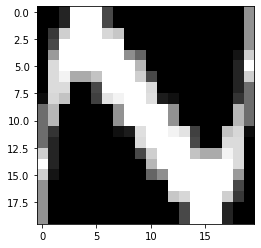

In [195]:
def plot_leter(X_vals, Y_vals, index):
    indx = Y_vals[index]

    print("%d in new index is ascii: %d (%c)" % (indx, iToAC[indx], chr( iToAC[indx] ) ) )
    img = X_vals[index] #.view((20,20))

    img = img.reshape(20,20)
    plt.imshow( img, cmap="gray", interpolation="none" )

plot_leter(XsC, YsC, 0)


90 in new index is ascii: 36 ($)


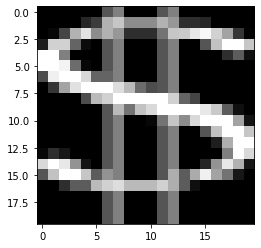

In [166]:
plot_leter(XsC, YsC, 90)

In [196]:
def shuffle_sets( inx, iny, i, j ):
    ox = inx.copy()
    oy = iny.copy()

    val = len(inx)

    ox[j] = inx[i]
    oy[j] = iny[i]
        
    ox[i] = inx[j]
    oy[i] = iny[j]

    return ox, oy


XsCombo, YsCombo = shuffle_sets( XsC, YsC, 0, 90 )

# print ("first shuffle ", len(XsCombo))
# print ("first shuffle ", len(YsCombo))

for i in range( 0, len(XsCombo)):
    w = np.random.randint(0,len(XsCombo))
    z = np.random.randint(0,len(XsCombo))

    XsCombo, YsCombo = shuffle_sets(XsCombo, YsCombo, w, z)

# plot_leter(XsCombo)

XsCombo = XsCombo/256.0

# print ("result ", len(XsCombo))
# print ("result ", len(YsCombo))

In [168]:
print(YsCombo)
print(XsC[0][0][0])
print(XsCombo[0][0][0])

[10 36  2 ... 17 92 60]
[  1   1  37 255 255 255  73   1   1   1   1   1   1   1   1   1   1   1
   1 146]
[0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.14453125 0.5546875  0.88671875 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625]


10 in new index is ascii: 116 (t)


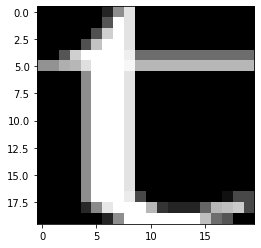

In [169]:
plot_leter(XsCombo, YsCombo, 0)

23 in new index is ascii: 103 (g)


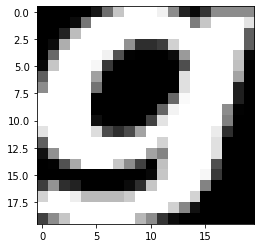

In [170]:
plot_leter(XsCombo, YsCombo, 90)

In [197]:
train_dataC = []
for i in range(len(XsC)):
    train_data.append([XsC[i], YsC[i]])

xTrainC = XsC[:int(len(XsC)*3/4)]
xTestC = XsC[int(len(XsC)*3/4):]
yTrainC = YsC[:int(len(XsC)*3/4)]
yTestC = YsC[int(len(XsC)*3/4):]

Xset1 = torch.from_numpy(xTrainC).to(torch.float)
Yset1 = torch.from_numpy(yTrainC)

Xset2 = torch.from_numpy(xTestC).to(torch.float)
Yset2 = torch.from_numpy(yTestC)

my_trainC = TensorDataset(Xset1, Yset1) # create your datset
my_testC = TensorDataset(Xset2, Yset2) # create your datset


# indx = 120

# print("index is: ", my_trainC[1][indx])
# ascii_valC = iToAC[ indx ]
# indx_val = aToIC[ ascii_valC ]
# print("to ascii", ascii_valC, chr(ascii_valC) )
# print("to indx: ", indx_val )

# img = my_trainC[0][aToIC[ ascii_valC ]]
# img = img.reshape(20,20)
# plt.imshow( img, cmap="gray", interpolation="none" )

In [198]:
class NetBest(nn.Module):
    def __init__(self):
        super(NetBest, self).__init__()
        c1Out = 6 # convolution layer 1 will output 6 "images": one for each filter it trains
        c2Out = 16 # similarly for the 2nd convolution layer
        self.conv1 = nn.Conv2d( 1, c1Out, 3 ) # 1-D input, c1Out outputs, filter size 3x3 pixels
        
        # (28-2) x (28 -2) x c1Out outputs  # "-2" because 3x3 mask loses the 1st/last row/column
        
        self.pool = nn.MaxPool2d( 2, 2 ) # down sample 2x2 blocks to 1 value
        
        # 13*13*c1Out
        
        self.conv2 = nn.Conv2d( c1Out, c2Out, 3 ) # Inputs comes from conv1, specify our #outputs, use 3x3 blocks again
        
        # (13-2)*(13 -2)*c2Out
        # pool again
        # (11/2)*(11/2)*c2Out = 5x5 x c2Out
        
        #this is tricky.  The convolutions each shave 1 pixel off around the border, and then the
        #max pools reduce the number of pixels by 4
        self.pooledOutputSize = c2Out * 5 * 5 # 16 outputs per image whose size has been reduced
        
        # ******* Ax + b ([weight x input] + bias) since it’s just entirely linear, with no activation function. *****
        #All we're doing is just defining values for some layers, we're calling them fc1, fc2...etc, but you could call 
        # them whatever you wanted. The fc just stands for fully connected. Fully connected refers to the point that 
        # every neuron in this layer is going to be fully connected to attaching neurons. Nothing fancy going on here! 
        # Recall, each "connection" comes with weights and possibly biases, so each connection is a "parameter" for 
        # the neural network to play with.
        #In our case, we have 4 layers. Each of our nn.Linear layers expects the first parameter to be the input size, 
        # and the 2nd parameter is the output size.
        #So, our first layer takes in 28x28, because our images are 28x28 images of hand-drawn digits.
        # A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.
        #self.fc1 = nn.Linear( self.pooledOutputSize, 120 )
        
        #144 is the pooling layer number of nodes
        self.fc1 = nn.Linear( 144, 120 )
        self.fc2 = nn.Linear( 120, 84 )
        self.fc3 = nn.Linear( 84, len(Ys) ) # length of outputs, shouldn't be hardcoded

    ################################################################################
    # Take an image (or images) and run it through all stages of the net:
    #    
    def forward( self, x ): # "batch" of images
        # x is 4D tensor:  (batch size, width, height, #channels (1, grayscale image))
        # after conv1:  (batch size, width adjusted, height adjusted, conv1 # outputs)
        # after max pool: (batch size, width/2, height/2, conv1 # outputs)
        # print ("the type is: ", type(x))
        # print(x.shape) # During creation / debugging, getting the shape of layers correct is challenging... so display them.
        #x = F.relu(self.conv1(x)
        x = self.conv1(x)
        #print(x.shape)
        x = F.relu(x)
        #print(x.shape)
        x = self.pool(x)
       # print(x.shape)

        # Split into 2 lines above
        #x = self.pool(F.relu(self.conv1(x)))  #apply convolution filter, then run it through relu activation function
        x = self.pool(F.relu(self.conv2(x))) #ditto
        #print(x.shape) #uncomment to see the size of this layer.  It helped me figure out what pooledOutputSize shoudl be

        # Flatten: turn the 5x5xc2Out array into a single 1xN array.  The dense layers expect a 1D thing
        x = x.view(-1, self.num_flat_features(x))
        #print(x.shape)
        # x = x.view(x.shape[0], -1)  #equivalent ways of reshaping the data to be 1D
        # x = x.view(batch_size( x.shape[0]) , -1)
        x = F.relu(self.fc1(x)) #apply dense layer 1
        x = F.relu(self.fc2(x)) #and dense layer 2, using ReLU activation
        x = self.fc3(x) #final dense layer.  No activation function on this
        # print ("x shape: ",  x.shape)
        return x
    
    #compute the output size after our convolution layers
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net_best = NetBest()

In [199]:
def train( model, epochs ): # One epoch uses the entire training set (one batch at a time) - 60,000 images in this case
    
    criterion = nn.CrossEntropyLoss() # this is a way of measuring error (loss) for classification that takes the
                                      # "confidence" of a prediction into account.  High confidence, correct predictions are low cost, 
                                      # high confidence, wrong predictions are high cost, medium confidence predictions have cost

    # use the ADAM optimizer to find the best weights
    optimizer = optim.Adam( model.parameters(), lr= 1e-4 ) 
    
    #this loads data and gets it in the right format for us
    trainloader = torch.utils.data.DataLoader( 
        my_trainC, 
        batch_size=8,
        shuffle=False, 
        num_workers=0,
        collate_fn=None,
        pin_memory=False )

    #print( "my data is: ", my_train)

    # print("here:", max(my_train.tensors[1]))
    # print("here:", min(my_train.tensors[1]))

    for epoch in range( epochs ): # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate( trainloader, 0 ):
            # get the inputs; data is a list of [inputs, labels]

            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            #print("shape:", inputs.shape)
            outputs = model(inputs) #predict the output with some training data
            # print("These are my labels: " , labels)
            # print(outputs.shape)
            loss = criterion(outputs, labels) #see how well we did

            loss.backward() #see how to change the weights to do better
            optimizer.step() #and actually change the weights

            # print statistics
            running_loss += loss.item()
            if i % 20 == 19:    # print every 2000 mini-batches
                # print('[%d, %5d] loss: %.3f' %
                      #(epoch + 1, i + 1, running_loss / 20))
                running_loss = 0.0

    print('Finished Training')

def evaluate( model ):  
    #load some test data
    testloader = torch.utils.data.DataLoader( 
        my_testC, 
        batch_size=8,
        shuffle=False,
        num_workers=0,
        collate_fn=None,
        pin_memory=False )
    
    correct = 0
    total = 0

    with torch.no_grad(): # <- Since we are not training, the model does not need to calculate gradients
        for data in testloader:
            images, labels = data
            outputs = model( images )
            _, predicted = torch.max(outputs.data, 1)
            #print("predict:", predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Just do a coarse evaluation... how many did we predict correcly?
    print( 'Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total) )
    

In [200]:
print( "Training..." )
train( net_best, 50 )

print( "Evaluating..." )
evaluate( net_best )

Training...
Finished Training
Evaluating...
Accuracy of the network on the 10000 test images: 77 %


tensor([0])
torch.Size([1, 20, 20])
tensor([1])
torch.Size([1, 20, 20])
tensor([79])
torch.Size([1, 20, 20])
tensor([3])
torch.Size([1, 20, 20])
tensor([4])
torch.Size([1, 20, 20])
tensor([5])
torch.Size([1, 20, 20])
tensor([6])
torch.Size([1, 20, 20])
tensor([7])
torch.Size([1, 20, 20])


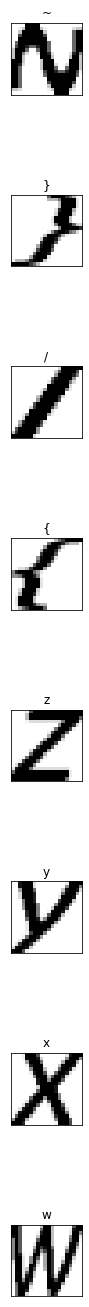

In [216]:
def drawComp(model):
   test_loader = torch.utils.data.DataLoader(my_testC, batch_size=1, shuffle=False, num_workers=0)
   plt.figure(figsize=(20, 25))
   with torch.no_grad():
      for i, batch in enumerate(test_loader):
         if i >= 8: break
         images = batch[0]
         # images, labels = batch
         #print(images.shape)
     
         label = model(images)
         
         for j in range(len(images)):
            _, index = ( torch.max(label.data, 1) )
            print (index)
            print( images[j].shape)
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[j].reshape((20,20)), cmap="Greys", interpolation=None)
            # print (len(label[0]))
            # print ((label))
            # print (int(label))
            plt.title( chr(iToAC[int(index)]) )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComp(net_best)

Part 4

In [217]:
class CnnNet(nn.Module):
   def __init__(self):
      super(CnnNet, self).__init__()

      self.encodedSize = 32

      self.c1Out = 8 # filters from first conv layer
      self.c2Out = 8 # filters from 2nd conv layer

      #the padding here puts a "border" of 0s around the image, so that convolution layers don't "shrink" the image

      self.cv1 = nn.Conv2d(1, self.c1Out, 3, padding=1) #stick with 3x3 filters
      #output is 8x 28x28 images
      self.pool = nn.MaxPool2d(2,2)
      self.cv2 = nn.Conv2d(self.c1Out, self.c2Out, 3, padding=1)
      #reuse pool here

      self.downscaledSize = 20//4 #we add padding, so the conv2d layers don't change the size, just the max pools
      self.flattenedSize = self.downscaledSize*self.downscaledSize*self.c2Out

      self.fc1 = nn.Linear(self.flattenedSize, 64)
      self.fc2 = nn.Linear(64, self.encodedSize) #scale down to 64 features

      #now we're encoded, so go define decoding pieces

      self.fc3 = nn.Linear(self.encodedSize, 64) #scale down to 64 features
      self.fc4 = nn.Linear(64, self.flattenedSize)


      self.upsample = nn.Upsample(scale_factor=2, mode='bilinear')
      # the padding is very important here so we don't have to guess a "frame" of pixels around the image
      self.cv3 = nn.Conv2d(self.c2Out, self.c1Out, 3, padding=1)
      # apply upsample again
      self.cv4 = nn.Conv2d(self.c1Out, 1, 3, padding=1)


   def compress(self, x):
      x = self.cv1(x)
      #print("shape after cv1", x.shape)
      x = F.relu(self.pool(x))
      #print("shape after pool1", x.shape)
      x = self.cv2(x)
      #print("after cv2", x.shape)
      x = F.relu(self.pool(x))
      #print("after pool 2", x.shape)
      x = x.view(-1, self.flattenedSize)
      #print("flattened shape", x.shape)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      #now we have a low-d representation of our data.  If we were doing compression, we'd store this
      return x

   def decompress(self, x):
      x = F.relu(self.fc3(x))
      x = F.relu(self.fc4(x))
      #print(x.shape)
      x = x.view(-1, self.c2Out, self.downscaledSize, self.downscaledSize)
      #print("unflattened shape", x.shape)
      x = self.upsample(x)
      #print("upsample", x.shape)
      x = F.relu(self.cv3(x))
      #print(x.shape, "after cv3")
      x = self.cv4(self.upsample(x))
      #print(x.shape, "after both upsamples")
      return x

   def forward(self, x):
      x = self.compress(x)
      x = self.decompress(x)

      return x

cnnNet = CnnNet() # treat these as just 28 D vectors

In [232]:
#same as we did before except for the reshaping.  CNNs understand 2D images, so we don't want to flatten

# mean-squared error loss
# this is the normal "least squares" error function, divided by the number of data points
criterion = nn.MSELoss()

def trainCNN(model, epochs):
   # create an optimizer object
   # Adam optimizer with learning rate 1e-3
   optimizer = optim.Adam(model.parameters(), lr=1e-3)

   train_loader = torch.utils.data.DataLoader(my_train, batch_size=1, shuffle=True, num_workers=0)

   for epoch in range(epochs):
      loss = 0

      running_loss = 0

      for i, data in enumerate(train_loader, 0):

         #same as yesterday, except we're not even looking at the labels!
         # since we're not using a CNN, we need to "flatten" the input images
         batch_features = data[0]

         # reset the gradients back to zero
         # PyTorch accumulates gradients on subsequent backward passes
         optimizer.zero_grad()

         # compute reconstructions
         outputs = model(batch_features)
         #print(batch_features.shape)
         #print(outputs.shape)
         # compute training reconstruction loss
         # again, same idea as yesterday, but we're measuring the error slightly differently
         # how well does the reconstructed image match the input image?
         train_loss = criterion(outputs, batch_features)

         # compute accumulated gradients
         train_loss.backward()

         # perform parameter update based on current gradients
         optimizer.step()

         # add the mini-batch training loss to epoch loss
         loss += train_loss.item()

         # print statistics
         # running_loss += train_loss.item()
         # if i % len(train_loader) == int(len(train_loader)/10):    # print every 2000 mini-batches
         #    x = print('[%d, %5d] loss: %.8f' % (epoch + 1, i + 1, running_loss / 20))
         #running_loss = 0.0


      # compute the epoch training loss
      loss = loss / len(train_loader)

      # display the epoch training loss
      #print("epoch : {}/{}, loss = {:.8f}".format(epoch + 1, epochs, loss))

def evaluateCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test, batch_size=1, shuffle=True, num_workers=0)
   total_loss = 0
   with torch.no_grad():
      for data in test_loader:
         images = data[0]
         outputs = model(images)
         test_loss = criterion(outputs, images)
         total_loss += test_loss.item()

   print("overall loss: ", total_loss)
  

In [233]:
epochs = 50

print( "Train: (%d epochs)" % epochs )
trainCNN(cnnNet, epochs)

print( "Evaluate:" )
evaluateCNN(cnnNet)

Train: (50 epochs)
Evaluate:
overall loss:  9.594546942971647


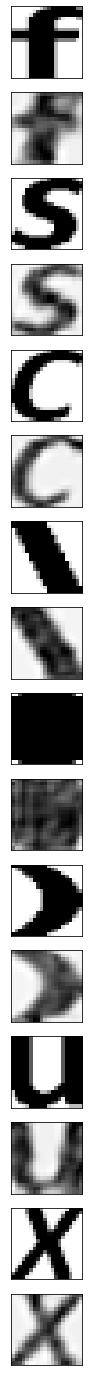

In [234]:
def drawComparisonsCNN(model):
   test_loader = torch.utils.data.DataLoader(my_test, batch_size=1, shuffle=True, num_workers=0)
   plt.figure(figsize=(20, 25))
   for i, batch in enumerate(test_loader):
      if i >= 8: break
      images = batch[0]
      #print(images.shape)
      with torch.no_grad():
         reconstructed = model(images)
         for j in range(len(images)):
            #draw the original image
            ax = plt.subplot(16, 8, i*16 + j + 1)
            plt.imshow(images[j].reshape((20,20)), cmap="Greys", interpolation=None)
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            #and the reconstructed version in the next row
            ax = plt.subplot(16, 8, i*16 + j + 1 + 8)
            plt.imshow(reconstructed[j].reshape((20,20)), cmap="Greys", interpolation=None)
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

drawComparisonsCNN(cnnNet)